In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.shape

(400, 5)

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
# Encode categorical variables if necessary
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [7]:
data.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [8]:
# SELECTING THE FEATUE TO BUILD K-MEANS MODEL
# HERE 'total_graduates'
X = data[['EstimatedSalary']]

In [9]:
# NORMALIZING THE DATA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

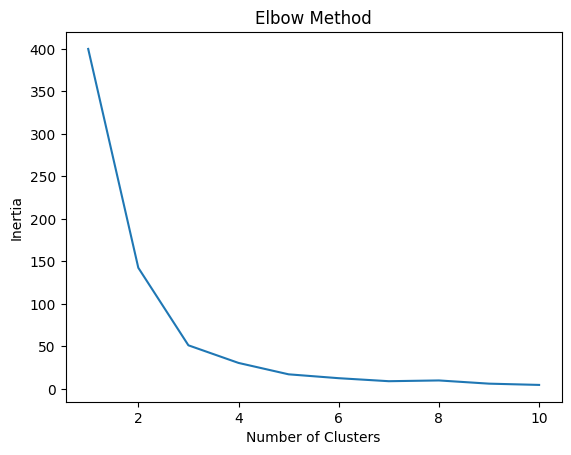

In [10]:
# Elbow method to determine optimal clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
# BUILD K-MEANS MODEL BASED ON ELBOW NUMBER
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# STORE PREDICTED CLASS IN A NEW COLUMN
data['cluster'] = kmeans.fit_predict(X_scaled)

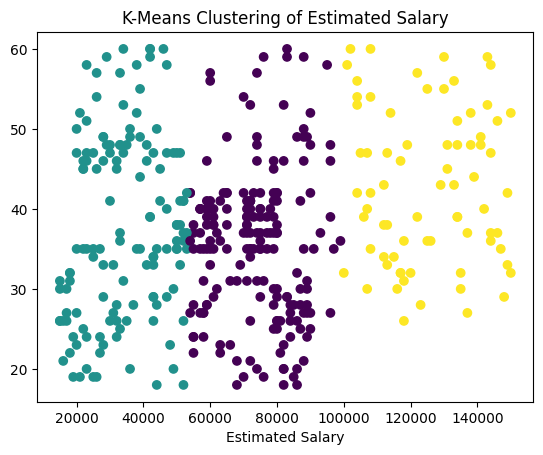

In [12]:
plt.scatter(data['EstimatedSalary'], data['Age'], c=data['cluster'], cmap='viridis')
plt.xlabel('Estimated Salary')
plt.title('K-Means Clustering of Estimated Salary')
plt.show()

In [13]:
cluster_summary = data.groupby('cluster')['EstimatedSalary'].describe()
print(cluster_summary)

         count           mean           std       min       25%       50%  \
cluster                                                                     
0        189.0   73730.158730  11504.217103   54000.0   63000.0   74000.0   
1        137.0   34226.277372  11452.583000   15000.0   25000.0   33000.0   
2         74.0  125310.810811  15189.150486  100000.0  112250.0  125000.0   

              75%       max  
cluster                      
0         82000.0   99000.0  
1         44000.0   53000.0  
2        138000.0  150000.0  


## K-MEANS ON 8 POINTS

In [14]:
import numpy as np

In [15]:
# Define the points
points = np.array([[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85],
                   [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]])

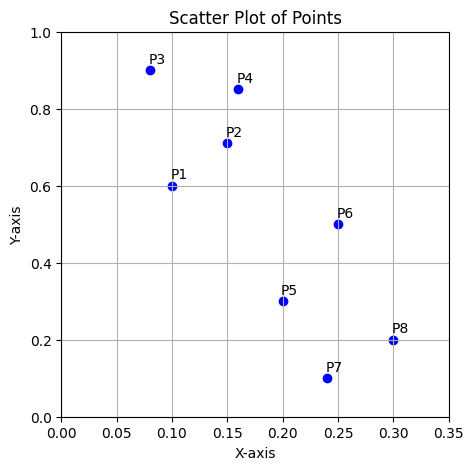

In [16]:
# Create a scatter plot
plt.figure(figsize=(5,5))
plt.scatter(points[:, 0], points[:, 1], color='blue', marker='o')

# Annotate each point
for i, point in enumerate(points):
    plt.annotate(f'P{i+1}', (point[0], point[1]), textcoords="offset points", xytext=(5,5), ha='center')

# Set titles and labels
plt.title('Scatter Plot of Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 0.35)
plt.ylim(0, 1)

# Show grid
plt.grid()

# Display the plot
plt.show()

In [17]:
# Initial centroids (P1 and P8)
initial_centroids = np.array([[0.1, 0.6], [0.3, 0.2]])

In [18]:
# Create KMeans model with predefined centroids
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, max_iter=1)

# Fit the model to the points
kmeans.fit(points)

KMeans(init=array([[0.1, 0.6],
       [0.3, 0.2]]), max_iter=1, n_clusters=2,
       n_init=1)

In [19]:
# Get cluster labels for each point
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

In [20]:
# Updated centroids after fitting
updated_centroids = kmeans.cluster_centers_
updated_centroids

array([[0.148     , 0.712     ],
       [0.24666667, 0.2       ]])

In [21]:
# Results
print("Cluster Labels for Each Point:")
for i, label in enumerate(labels):
    print(f"P{i+1} -> {label + 1}")

Cluster Labels for Each Point:
P1 -> 1
P2 -> 1
P3 -> 1
P4 -> 1
P5 -> 2
P6 -> 1
P7 -> 2
P8 -> 2


## 1] Which cluster does P6 belongs to?

In [22]:
# Identify which cluster P6 belongs to (P6 is points[5])
p6_cluster = labels[5] + 1
p6_cluster

np.int32(1)

## 2] What is the population of a cluster around m2?

In [23]:
# Population of a cluster around m2 (Cluster 2)
population_cluster_around_m2 = np.sum(labels == 1)  # Cluster 2 corresponds to label 1
population_cluster_around_m2

np.int64(3)

## 3] What is the updated value of m1 and m2?

In [24]:
# Updated values of m1 and m2 (centroids)
print(f"\nUpdated value of m1: {updated_centroids[0]}")
print(f"Updated value of m2: {updated_centroids[1]}")


Updated value of m1: [0.148 0.712]
Updated value of m2: [0.24666667 0.2       ]
